# Second assignment: Analyse your "realistic" graph

## Load Dataset

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import collections, itertools
import networkx as nx

In [2]:
G = nx.Graph()
edges = nx.read_edgelist('../datasets/dataset.txt')
G.add_edges_from(edges.edges())
posTotal = nx.spring_layout(G)

/Users/danilo/.conda/envs/ga/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Number of nodes: 5242
Number of edges: 14496


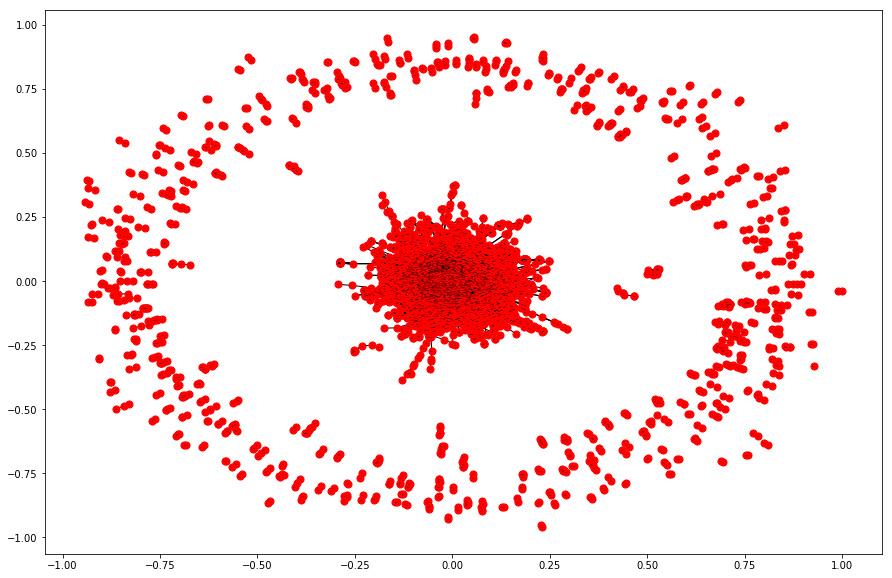

In [3]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G,posTotal, font_size=0, node_size=50)

#Print node numbers 
print("Number of nodes:",G.number_of_nodes())
#Print edges number G.number_of_edges()
print("Number of edges:",G.number_of_edges())

### Dataset stats (from https://snap.stanford.edu/data/ca-GrQc.html)
<img src="images/dataset.png">

## Node level measurements

In [69]:
#Utils class

class statistics:
    
    def __init__(self, d, measure):
        self.measure = measure
        self.orderedList = sorted(list(d.items()), key=lambda pair: pair[1])
        self.orderedKeys = sorted(list(d.keys()))
        self.orderedValues = sorted(list(d.values()))
    
    def average(self):    
        return np.mean(self.orderedValues)

    def variance(self):
        return np.var(self.orderedValues)

    def maximum(self):
        return self.orderedList[-1]

    def minimum(self):
        return self.orderedList[0]

    def median(self):
        return self.orderedList[len(self.orderedList)//2]
    
    def print_info(self):
        print("{} distribution:\n\taverage: {}\n\tvariance: {}\n\tmaximum: {}\n\tminimum: {}\n\tmedian: {}\n"
              .format(self.measure,self.average(),self.variance(),
                      self.maximum(),self.minimum(),self.median()))
    
    def barplot(self):
        key, cnt = zip(*collections.Counter(self.orderedValues).items())

        plt.figure(figsize=(15,10))
        plt.bar(key, cnt, width=0.80, color='b')
        plt.title(self.measure+" barplot")
        plt.ylabel("Count")
        plt.xlabel(self.measure)
        plt.xticks(key, rotation=90)
        plt.tight_layout()
    
    def histogram(self, bins=10):
        plt.figure(figsize=(15,8))
        counts,bins,_ = plt.hist(self.orderedValues, bins=bins)
                                  
        bin_centers = 0.5 * np.diff(bins) + bins[:-1]
        for count, x in zip(counts, bin_centers):
            # Label the raw counts
            plt.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
                         xytext=(0, -20), textcoords='offset points', va='top', ha='center')
            # Label the percentages
            percent = '%0.0f%%' % (100 * float(count) / counts.sum())
            plt.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
                         xytext=(0, -35), textcoords='offset points', va='top', ha='center')
        
        plt.title(self.measure+" histogram")
        plt.ylabel("Count")
        plt.xticks(bins)
        plt.show()

### Degree distribution

Degree distribution:
	average: 4.588235294117647
	variance: 14.595155709342562
	maximum: (33, 17)
	minimum: (11, 1)
	median: (28, 3)



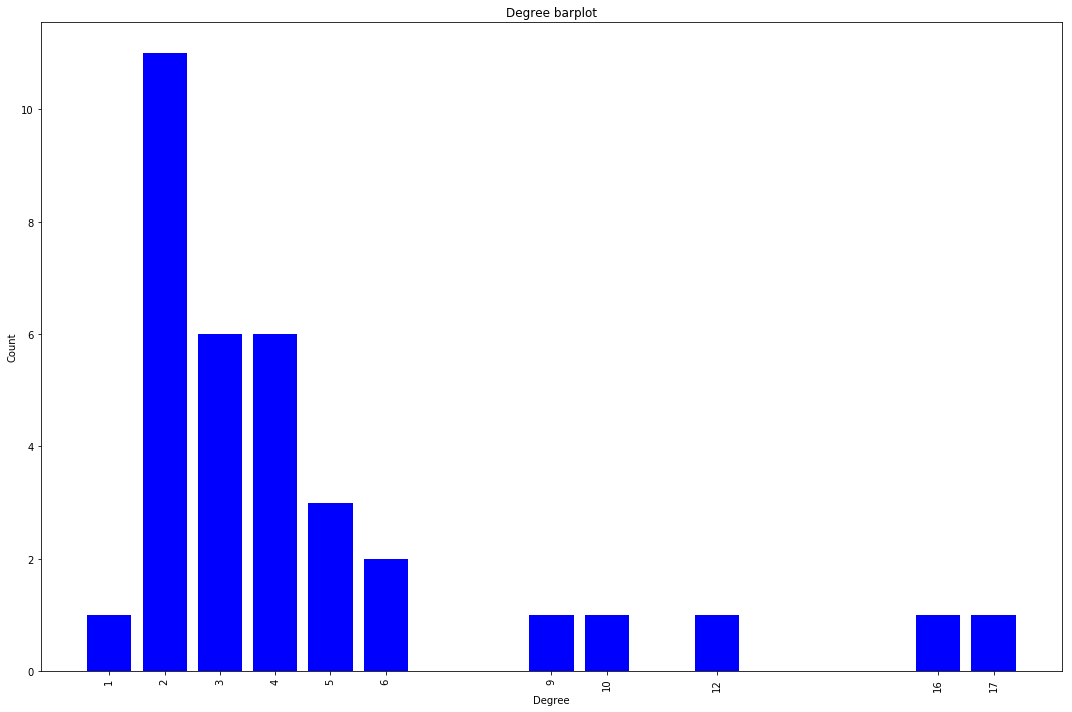

In [70]:
degree_stat = statistics(dict(G.degree),"Degree")
degree_stat.print_info()
degree_stat.barplot()

### Betweenness

In [10]:
btwc = nx.betweenness_centrality(G)

Betweenness distribution:
	average: 0.0006062707858585127
	variance: 3.8989784331005185e-06
	maximum: ('13801', 0.03702715043389754)
	minimum: ('5233', 0.0)
	median: ('21594', 0.0)



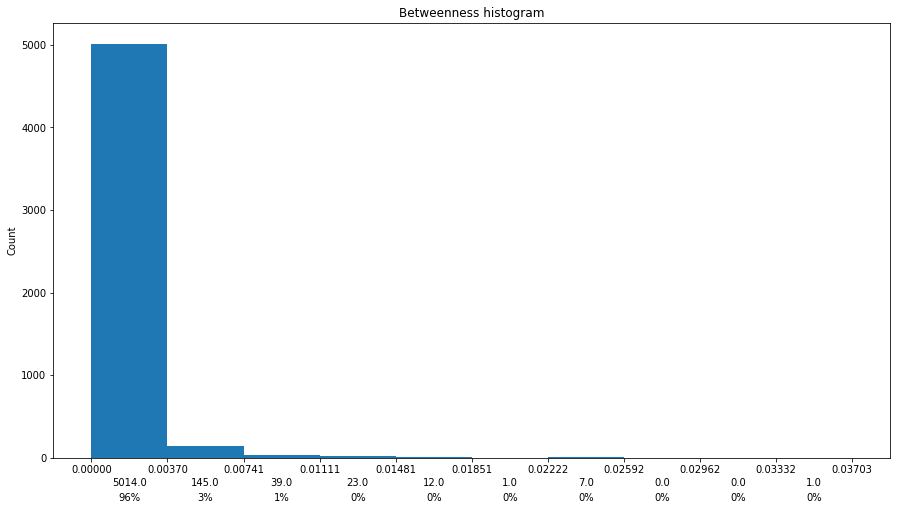

In [11]:
between_stat = statistics(btwc, "Betweenness")
between_stat.print_info()
between_stat.histogram()

### Closeness

In [12]:
clsn = nx.closeness_centrality(G)

Closeness distribution:
	average: 0.10630130466094839
	variance: 0.0032024611226696186
	maximum: ('13801', 0.19428463503141283)
	minimum: ('12295', 0.0)
	median: ('2607', 0.12792258161466954)



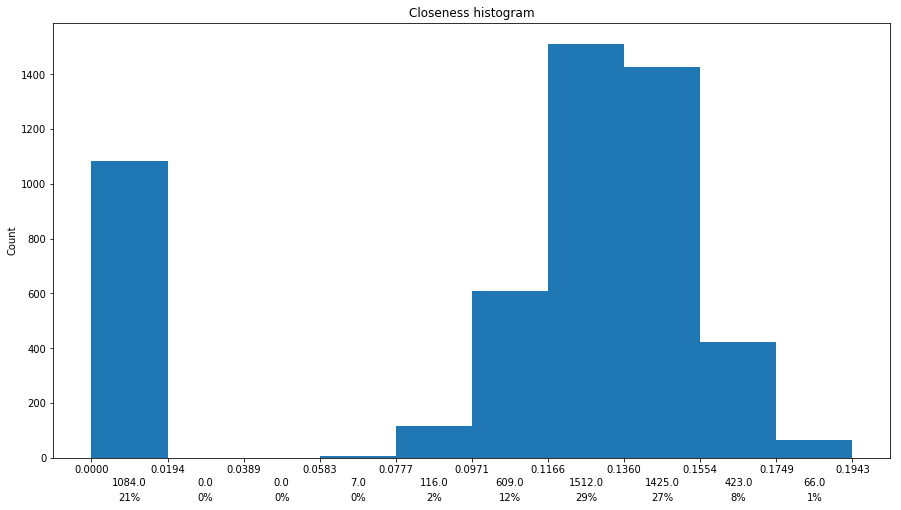

In [13]:
close_stat = statistics(clsn, "Closeness")
close_stat.print_info()
close_stat.histogram()

### Clustering

In [14]:
cl = nx.clustering(G)

0.6298424741263426


Clustering distribution:
	average: 0.5296358110521362
	variance: 0.18376828591636982
	maximum: ('19521', 1.0)
	minimum: ('24372', 0)
	median: ('6971', 0.5)



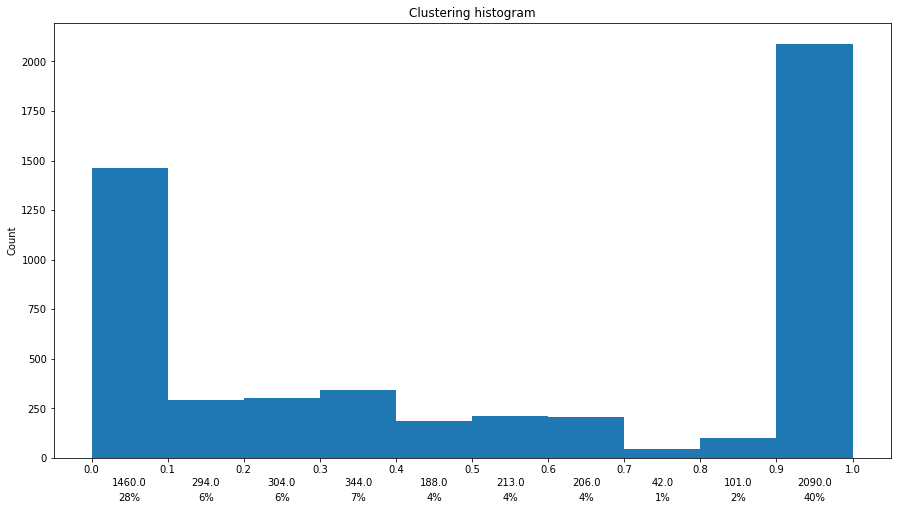

In [15]:
cluster_stat = statistics(cl, "Clustering")
cluster_stat.print_info()
cluster_stat.histogram()

### Pagerank

In [16]:
pgrnk = nx.pagerank_numpy(G)

Pagerank distribution:
	average: 0.0001907668828691339
	variance: 1.7611362331162616e-08
	maximum: ('14265', 0.0014427587831698954)
	minimum: ('4382', 3.797669433738513e-05)
	median: ('20116', 0.00016534502263061367)



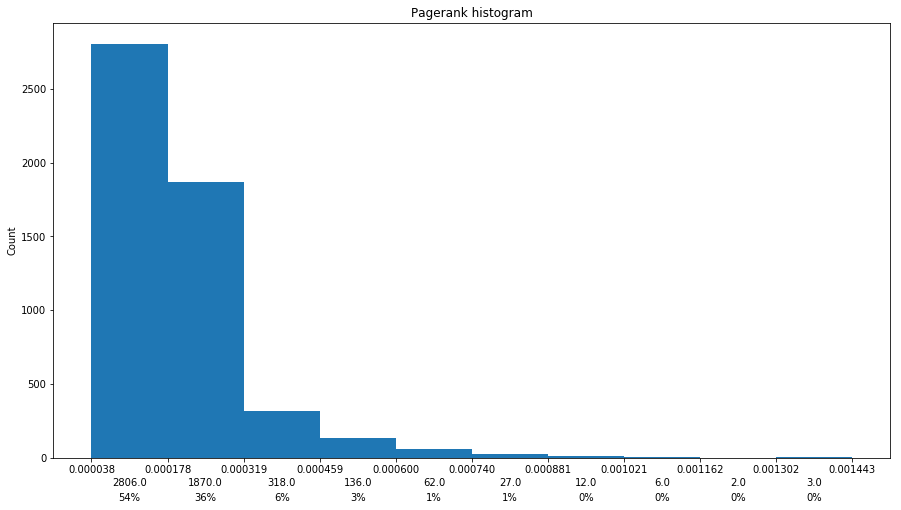

In [17]:
pagerank_stat = statistics(pgrnk, "Pagerank")
pagerank_stat.print_info()
pagerank_stat.histogram()

### HITS (hubs = authorities)

In [18]:
hubs = nx.hits_numpy(G)[0]

/Users/danilo/.conda/envs/ga/lib/python3.7/site-packages/networkx/algorithms/link_analysis/hits_alg.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  hubs = dict(zip(G, map(float, h)))
/Users/danilo/.conda/envs/ga/lib/python3.7/site-packages/networkx/algorithms/link_analysis/hits_alg.py:208: ComplexWarning: Casting complex values to real discards the imaginary part
  authorities = dict(zip(G, map(float, a)))


HITS (hubs) distribution:
	average: 0.000190766882869134
	variance: 2.6420454206524156e-06
	maximum: ('21012', 0.018432911493181284)
	minimum: ('16470', 0.0)
	median: ('8215', 2.731066165374546e-08)



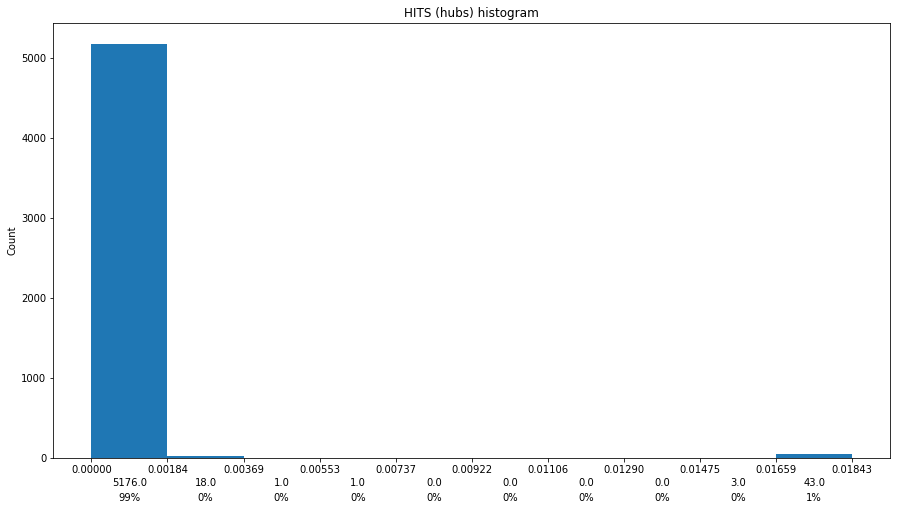

In [19]:
hubs_stat = statistics(hubs, "HITS (hubs)")
hubs_stat.print_info()
hubs_stat.histogram()

## Graph level measurement

### Giant component


In [49]:
G0 = max(nx.connected_component_subgraphs(G), key=len)

if(len(G)==len(G0)):
    print("Largest connected component covers the whole graph")
else:
    print("The Giant component covers the {}% of the whole graph".format(round(len(G0)/len(G)*100,2)))

Largest connected component covers the whole graph


### Community detection

In [50]:
from networkx.algorithms import community

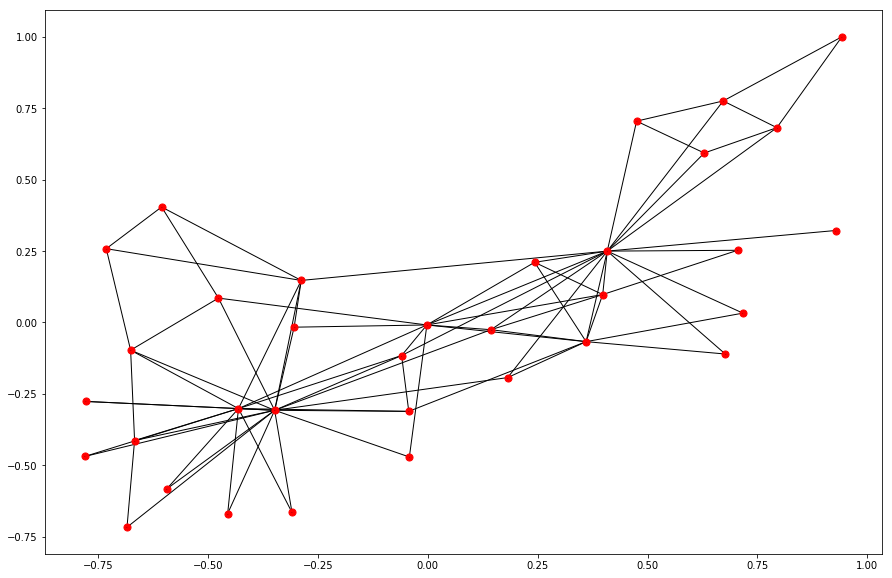

In [51]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(15,10))
nx.draw_networkx(G,pos, font_size=0, node_size=50)

**Girvan-Newman algorithm**
1. The betweenness of all existing edges in the network is calculated first.
2. The edge with the highest betweenness is removed.
3. The betweenness of all edges affected by the removal is recalculated.
4. Steps 2 and 3 are repeated until no edges remain.

In [52]:
communitiesGen_GW = community.girvan_newman(G)
top_GW = next(communitiesGen_GW)

In [53]:
communitiesGen_giantGW = community.girvan_newman(G0)
top_giantGW = next(communitiesGen_giantGW)

**Clauset-Newman-Moore greedy modularity maximization**

Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

modularity is calculated in this way<br>
Q = $\frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right)
            \delta(c_i,c_j)$

In [54]:
communities_greedMod = community.greedy_modularity_communities(G)

In [55]:
communities_giantGreedMod = community.greedy_modularity_communities(G0)

### Communities evaluation

In [56]:
def metric_evaluation(graph, communities, metric):
    return metric(graph, communities)

#### -- Girvan-Newman (betweenness)

In [57]:
metric_evaluation(G, top_GW, community.quality.coverage)

0.8717948717948718

In [58]:
metric_evaluation(G, top_GW, community.quality.modularity)

0.359960552268243

In [59]:
metric_evaluation(G, top_GW, community.quality.performance)

0.6114081996434938

#### -- Clauset-Newman-Moore (greedy modularity)

In [60]:
metric_evaluation(G, communities_greedMod, community.quality.coverage)

0.7564102564102564

In [61]:
metric_evaluation(G, communities_greedMod, community.quality.modularity)

0.3806706114398414

In [62]:
metric_evaluation(G, communities_greedMod, community.quality.performance)

0.714795008912656

### Communities visualisation

In [63]:
def display_communities(graph, comms):
    llist = [] # build a list of color for each community
    for node in graph:
        for i,comm in enumerate(comms):
            if node in comm:
                llist.append(i)
                break    
    vmax = len(np.unique(llist))-1
    
    plt.figure(figsize=(15,10))
    nx.draw_networkx(graph,node_color=llist,cmap = 'jet',vmin = 0,vmax=vmax,font_size=0,node_size=20)

#### -- Girvan-Newman (betweenness)

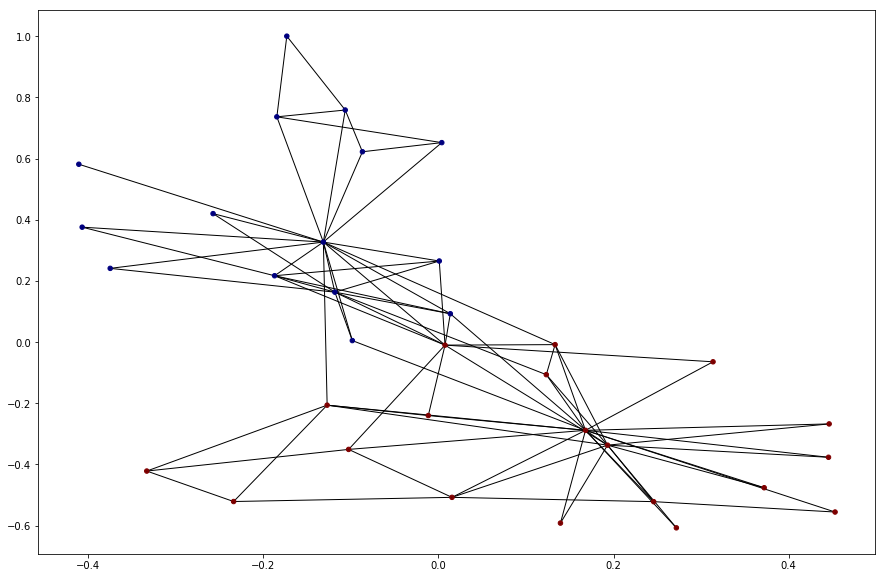

In [64]:
display_communities(G, top_GW)

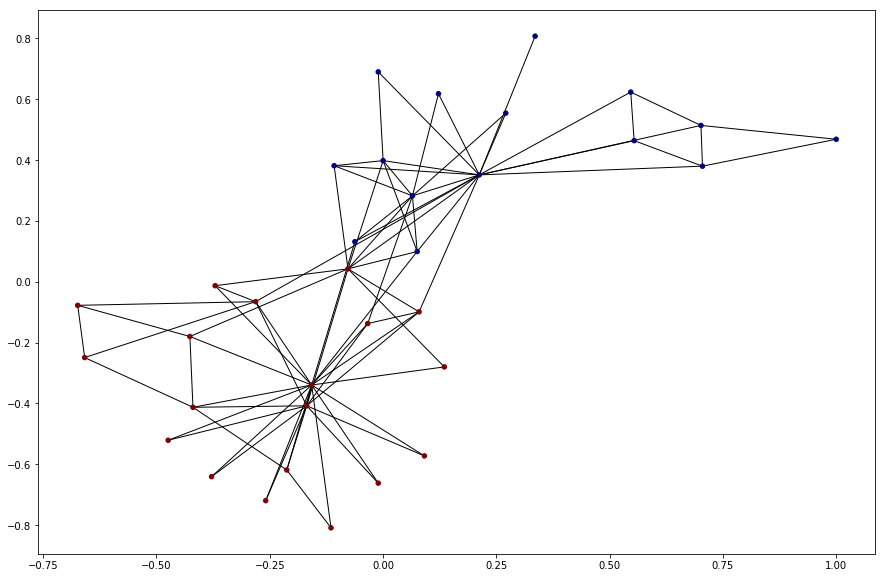

In [65]:
display_communities(G0, top_GW)

#### -- Clauset-Newman-Moore (greedy modularity)

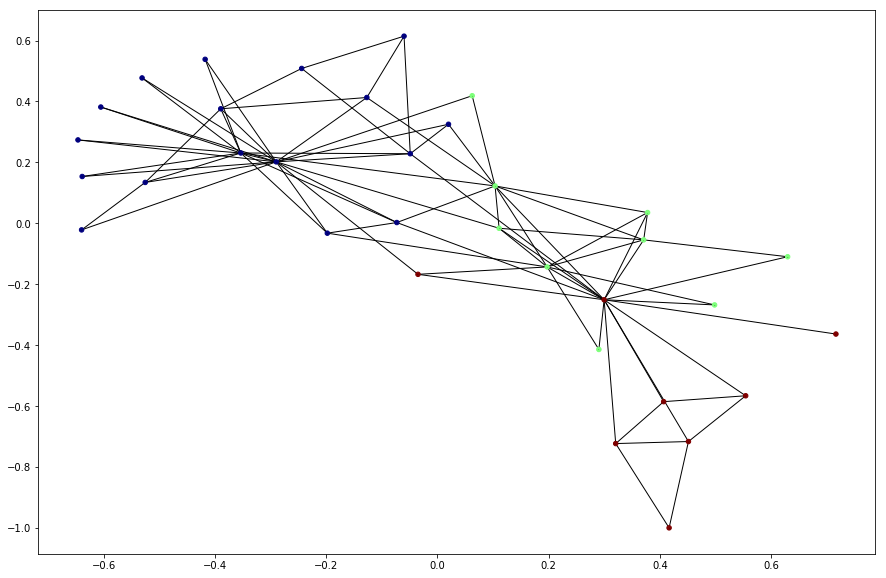

In [66]:
display_communities(G, communities_greedMod)

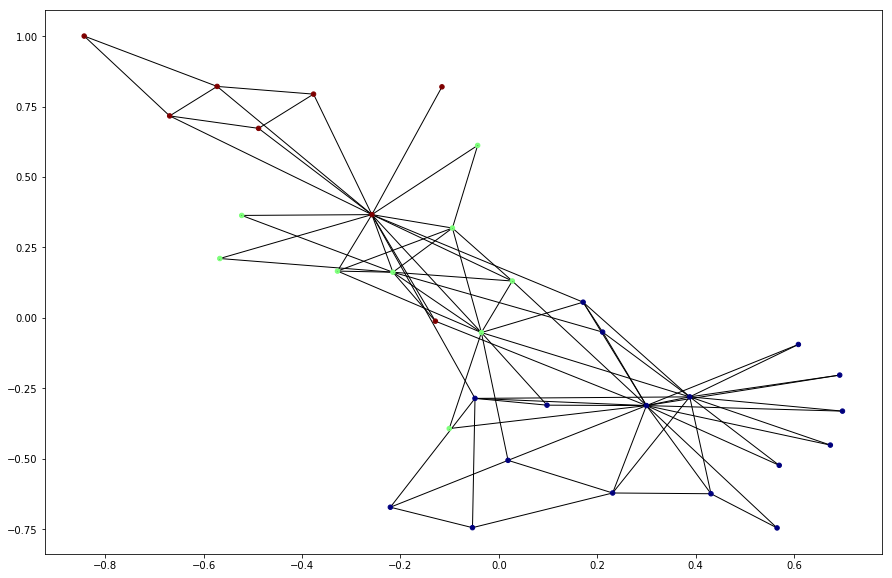

In [67]:
display_communities(G0, communities_greedMod)

### Measures summary of the whole graph

In [72]:
#Stats on the whole graph
density = nx.density(G)
avg_clust = nx.average_clustering(G)
trans = nx.transitivity(G)
diameter = float("Inf")
avg_path_lenght = float("Inf")
if(nx.is_connected(G)): # if is not connected we could not compute diameter and avg path length
    diameter = nx.diameter(G)
    avg_path_lenght = nx.average_shortest_path_length(G)

print("avg degree: ", degree_stat.average())
print("density: ", density)
print("diameter: ", diameter)
print("avg_path_lenght: ", avg_path_lenght)
print("avg_clustering coeff: ", avg_clust)
print("transitivity: ", trans)

avg degree:  4.588235294117647
density:  0.13903743315508021
diameter:  5
avg_path_lenght:  2.408199643493761
avg_clustering coeff:  0.5706384782076823
transitivity:  0.2556818181818182


In [73]:
# Stats on the Giant Component
degrees = [val for (node, val) in G0.degree]
avg_degree = sum(degrees)/len(degrees)

densityGiant = nx.density(G0)
diameterGiant = nx.diameter(G0)
transGiant = nx.transitivity(G0)
avg_path_lenghtGiant = nx.average_shortest_path_length(G0)
avg_clustGiant = nx.average_clustering(G0)

print("avg degree: ", avg_degree)
print("density: ", densityGiant)
print("diameter: ", diameterGiant)
print("avg_path_lenght: ", avg_path_lenghtGiant)
print("avg_clustering coeff: ", avg_clustGiant)
print("transitivity: ", transGiant)

avg degree:  4.588235294117647
density:  0.13903743315508021
diameter:  5
avg_path_lenght:  2.408199643493761
avg_clustering coeff:  0.5706384782076823
transitivity:  0.2556818181818182


### Direct question

**Does the graph have the same characteristics of a random or a power-law network?**<br>


In [124]:
from scipy.stats import poisson

def poisson_distr(average, peak, num):
    arr = []
    rv = poisson(average)
    for i in range(num+1):
        arr.append(rv.pmf(i)*4.5*peak)
        
    plt.plot(arr, 'r', linewidth=2.0)

def powerLaw_distr(peak, num):
    arr = []
    for i in range(1,num+2):
        arr.append(i**(-1.5)*peak)
        
    plt.plot(arr, 'r', linewidth=2.0)

##### -- Random graph testing

Transitivity: 0.2556818181818182
Clustering: 0.5706384782076823
Average degree: 4.588235294117647


True

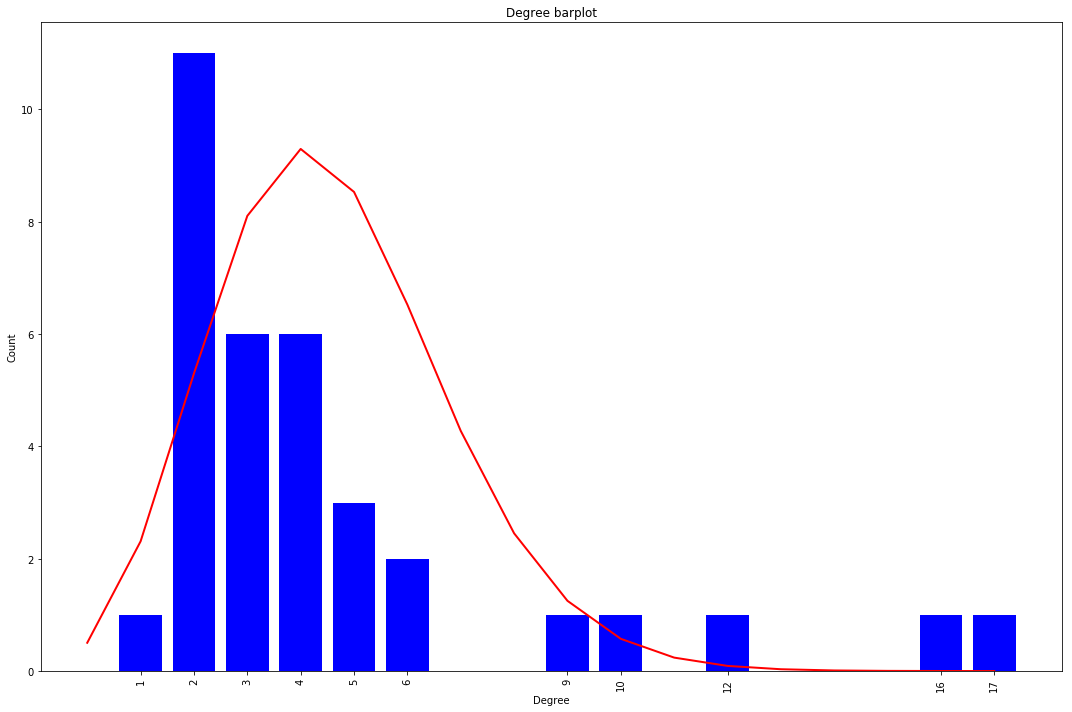

In [128]:
# Random graph has no transitivity or clustering
print("Transitivity: {}\nClustering: {}\nAverage degree: {}".format(trans, avg_clust, degree_stat.average()))

# Degree distribution
degree_stat.barplot()
poisson_distr(degree_stat.average(),
              max(collections.Counter(degree_stat.orderedValues).values()),
              degree_stat.maximum()[1])

# CONTROLLARE avg_degree > log N if true implies that these networks should be broken into isolated clusters
avg_degree > np.log(len(G))

##### -- Power-law distribution
As we seen in the graph below our graph behaves as a power law distribution; many nodes with only a few links, few hubs with large number of links

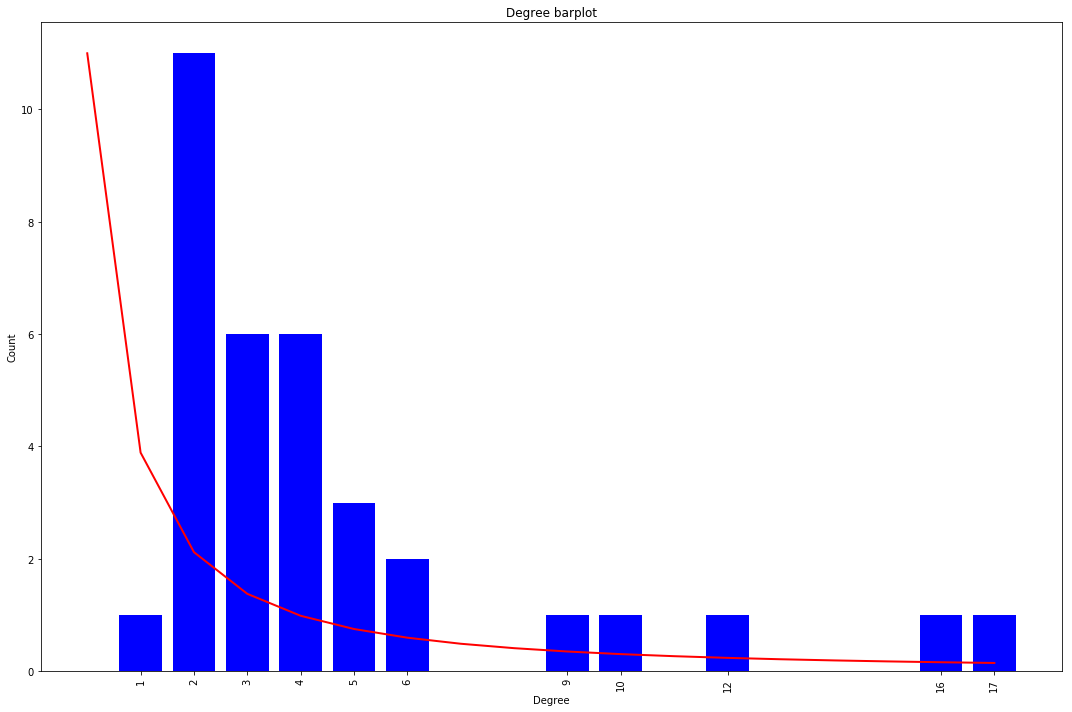

In [125]:

degree_stat.barplot()
powerLaw_distr(max(collections.Counter(degree_stat.orderedValues).values()),
              degree_stat.maximum()[1])

**Which are the most important nodes, with respect to a given centrality measure?**<br>


In [41]:
aux = nx.degree_centrality(G)
a = [key for (key, value) in sorted(aux.items(), key= lambda item: item[1],reverse=True)[:10]]
print(a)
#fare plot e stamparli di un altro colore

['21012', '21281', '22691', '12365', '6610', '9785', '21508', '17655', '2741', '19423']


**Are the paths short with respect to the size of the network?**<br>
if this ratio is near 0 it means that the short paths are much smaller than the network size; as opposite 
if the value is near 1 it means that the short path is similar to the longest minimum path (geodesic path)


In [42]:
avg_path_lenght/diameter

0.3558458833048823

**Is the network dense?**<br>


In [130]:
G.number_of_edges()*2.0/float(G.number_of_nodes()*(G.number_of_nodes()-1))

0.13903743315508021